Use yfinance to scrape historical stock prices

In [1]:
import yfinance as yf

In [110]:
#function to get stock data from ticker
def get_stock_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    return stock

In [111]:
ticker = 'AAPL'
start_date = '2019-01-01'
end_date = '2021-01-01'
apple_stock = get_stock_data(ticker, start_date, end_date)
print(apple_stock.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.793762  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.029240  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.481926  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.402954  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.077843  164101200


Use BeautifulSoup to scrape financial news

In [48]:
import requests
from bs4 import BeautifulSoup

In [6]:
!pip install newsapi-python

In [116]:

from newsapi import NewsApiClient

# Function to get news headlines from a ticker

def get_news_api(query):
    newsapi = NewsApiClient(api_key='d56fd1ebcacb4e089c9f73c50f3bb9da')
    all_articles = newsapi.get_everything(q=query, language='en', sort_by='relevancy', page_size=100)
    headlines = [article['title'] for article in all_articles['articles']]
    return headlines

In [118]:
news_headlines = get_news_api('Apple Inc')
print(f"Number of news headlines fetched: {len(news_headlines)}")

Number of news headlines fetched: 100


In [119]:
num_stock_prices = len(apple_stock)
num_news_articles = len(news_headlines)
print(f'Number of stock prices: {num_stock_prices}')
print(f'Number of news articles: {num_news_articles}')

Number of stock prices: 505
Number of news articles: 100


In [52]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [120]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
stop_words = set(stopwords.words('english'))

In [121]:
#function to clean and process news data
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)


In [122]:
cleaned_news = [preprocess_text(headline) for headline in news_headlines]
cleaned_news

['get job apple according tech career experts',
 'rumored ‘ google tv streamer ’ might fall short competing apple tv',
 'samsung galaxy watch ultra review want watch ’ always face',
 'apple director backs swift replace c choice programming language',
 'ceos like bernard arnault tim cook decorate offices',
 'ask wwdc',
 'apple research lab opening focusing boosting quality reliability',
 'apple defends business practices motion dismiss doj lawsuit',
 'report apple tv license films studios bolstering catalog originals',
 'report apple prepping 90 million iphone 16 units 2024 alone',
 'elon musk claims training “ world ’ powerful ai every metric ”',
 'report iphone 16 pro production coming india apple reduces china dependence',
 'child attacked alligator bayou st john',
 'ad agency zombifies tuaw ai copy recycled bylines stupid seo play',
 'apple micron leaders visit china us ramps chip curbs',
 'apple arcade guide everything available ’ new',
 'apple sees biggest gains quarterly personal

In [124]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Use NLTK's VADER to analyze the sentiment of the news articles:

robot = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return robot.polarity_scores(text)


In [125]:
sentiment_scores = [get_sentiment_scores(news) for news in cleaned_news]
sentiment_scores

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.0772},
 {'neg': 0.133, 'neu': 0.667, 'pos': 0.2, 'compound': 0.1531},
 {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.34},
 {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.2263},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'compound': -0.25},
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.4588},
 {'neg': 0.23, 'neu': 0.608, 'pos': 0.162, 'compound': -0.25},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'c

Combine the sentiment scores with the stock data

In [126]:
#also add SMA
def add_technical_indicators(df):
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df = df.dropna(subset=['SMA_20', 'SMA_50'])  # Drop rows with NaN values for SMA
    return df

import pandas as pd

# Merging sentiment scores with stock data
def merge_sentiment_with_stock_data(stock_data, sentiment_scores):
    sentiment_scores = sentiment_scores[:len(stock_data)]
    sentiment_df = pd.DataFrame(sentiment_scores)
    sentiment_df['date'] = pd.to_datetime(stock_data.index[:len(sentiment_scores)])
    merged_data = pd.merge(stock_data, sentiment_df, left_index=True, right_on='date')
    merged_data = merged_data.drop(columns='date')
    return merged_data

In [127]:
apple_stock = add_technical_indicators(apple_stock)
merged_data = merge_sentiment_with_stock_data(apple_stock, sentiment_scores)
merged_data

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,neg,neu,pos,compound
0,45.974998,46.025002,45.639999,45.932499,44.159264,94318000,43.704000,41.35925,0.000,1.000,0.000,0.0000
1,46.212502,46.832500,45.935001,46.529999,44.733704,156171600,43.895500,41.50025,0.000,1.000,0.000,0.0000
2,46.450001,47.097500,46.447498,47.005001,45.190365,104879200,44.115500,41.72940,0.000,0.860,0.140,0.0772
3,47.087502,47.247501,46.480000,46.632500,44.832241,126585600,44.310500,41.92075,0.133,0.667,0.200,0.1531
4,46.557499,47.372501,46.182499,47.040001,45.224022,124140800,44.512125,42.12190,0.000,0.737,0.263,0.3612
...,...,...,...,...,...,...,...,...,...,...,...,...
95,52.189999,52.540001,51.827499,52.195000,50.373245,135742800,51.252125,48.90590,0.000,0.761,0.239,0.2960
96,54.105000,55.342499,52.825001,53.259998,51.401070,277125600,51.381000,49.05565,0.000,0.761,0.239,0.2960
97,53.474998,54.507500,51.685001,52.107498,50.288792,216071600,51.431250,49.16480,0.000,0.761,0.239,0.2960
98,51.382500,51.607498,50.407501,51.005001,49.224789,163448400,51.428625,49.27100,0.000,0.761,0.239,0.2960


Now lets use Machine Learning

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [129]:
# Preparing the data
features = ['SMA_20', 'SMA_50', 'compound', 'neg', 'neu', 'pos']
X = merged_data[features].dropna()
y = merged_data.loc[X.index, 'Close']

In [61]:
print(merged_data.head())
print(merged_data.info())

        Open       High        Low      Close  Adj Close     Volume  \
0  44.950001  45.134998  44.452499  44.915001  43.347343  146118800   
1  45.049999  45.535000  44.654999  44.742500  43.180862   94858800   
2  44.730000  45.147499  44.477501  44.557499  43.002319  111792800   
3  44.105000  44.837502  44.000000  44.345001  42.797230  113924800   
4  44.487499  44.807499  44.167500  44.575001  43.019207   84873600   

      SMA_20    SMA_50  Signal  Strategy  Cumulative Strategy Returns  \
0  49.120625  48.96140      -1 -0.019070                    -0.041749   
1  48.804000  48.93760       1  0.001841                    -0.039985   
2  48.474250  48.89815       0 -0.005135                    -0.044915   
3  48.183125  48.84495      -1 -0.001000                    -0.045870   
4  47.780375  48.80380       1 -0.007187                    -0.052727   

   Cumulative Market Returns    neg    neu    pos  compound  
0                  -0.022152  0.000  1.000  0.000    0.0000  
1         

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.45811693534675835


Pairs Trading Strategy

In [131]:
import numpy as np
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs_rolling(data, window=252, threshold=0.05):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    pairs = []

    for start in range(len(data) - window):
        end = start + window
        rolling_data = data[start:end]
        for i in range(n):
            for j in range(i + 1, n):
                stock1 = rolling_data.iloc[:, i]
                stock2 = rolling_data.iloc[:, j]
                score, pvalue, _ = coint(stock1, stock2)
                score_matrix[i, j] = score
                pvalue_matrix[i, j] = pvalue
                if pvalue < threshold and not np.isclose(np.corrcoef(stock1, stock2)[0, 1], 1):
                    pairs.append((rolling_data.columns[i], rolling_data.columns[j], start, end))
    return score_matrix, pvalue_matrix, pairs

In [132]:
sample_data = pd.DataFrame({
    'AAPL': apple_stock['Close'],
    'MSFT': get_stock_data('MSFT', start_date, end_date)['Close']
})
score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(sample_data)
print(f'Cointegrated pairs: {pairs}')

[*********************100%%**********************]  1 of 1 completed

Cointegrated pairs: [('AAPL', 'MSFT')]



<ipython-input-63-dbd901a42a67>:13: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  score, pvalue, _ = coint(stock1, stock2)


In [133]:
def generate_trading_signals(stock_data, sentiment_scores):
    if len(sentiment_scores) > len(stock_data):
        sentiment_scores = sentiment_scores[:len(stock_data)]
    elif len(sentiment_scores) < len(stock_data):
        raise ValueError("Not enough sentiment scores to match stock data length.")

    signals = []
    for i in range(len(stock_data)):
        if sentiment_scores[i]['compound'] > 0.2:
            signals.append(1)  # Buy signal
        elif sentiment_scores[i]['compound'] < -0.2:
            signals.append(-1)  # Sell signal
        else:
            signals.append(0)  # Hold signal
    return signals

if len(sentiment_scores) < len(apple_stock):
    apple_stock = apple_stock.iloc[:len(sentiment_scores)]


In [134]:
trading_signals = generate_trading_signals(apple_stock, sentiment_scores)
apple_stock['Signal'] = trading_signals
print(apple_stock.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-03-14  45.974998  46.025002  45.639999  45.932499  44.159264   94318000   
2019-03-15  46.212502  46.832500  45.935001  46.529999  44.733704  156171600   
2019-03-18  46.450001  47.097500  46.447498  47.005001  45.190365  104879200   
2019-03-19  47.087502  47.247501  46.480000  46.632500  44.832241  126585600   
2019-03-20  46.557499  47.372501  46.182499  47.040001  45.224022  124140800   

               SMA_20    SMA_50  Signal  
Date                                     
2019-03-14  43.704000  41.35925       0  
2019-03-15  43.895500  41.50025       0  
2019-03-18  44.115500  41.72940       0  
2019-03-19  44.310500  41.92075       0  
2019-03-20  44.512125  42.12190       1  


In [135]:
import matplotlib.pyplot as plt

def backtest_strategy(stock_data, trading_signals, transaction_cost=0.001, stop_loss=0.02, take_profit=0.05):
    stock_data['Strategy'] = stock_data['Signal'].shift(1) * stock_data['Close'].pct_change()
    stock_data['Strategy'] -= transaction_cost * abs(stock_data['Signal'].diff())

    # Implement stop-loss and take-profit
    stock_data['Strategy'] = np.where(stock_data['Strategy'] < -stop_loss, -stop_loss, stock_data['Strategy'])
    stock_data['Strategy'] = np.where(stock_data['Strategy'] > take_profit, take_profit, stock_data['Strategy'])

    stock_data['Cumulative Strategy Returns'] = (1 + stock_data['Strategy']).cumprod() - 1
    stock_data['Cumulative Market Returns'] = (1 + stock_data['Close'].pct_change()).cumprod() - 1

    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Cumulative Strategy Returns'], label='Strategy Returns')
    plt.plot(stock_data['Cumulative Market Returns'], label='Market Returns')
    plt.legend()
    plt.show()


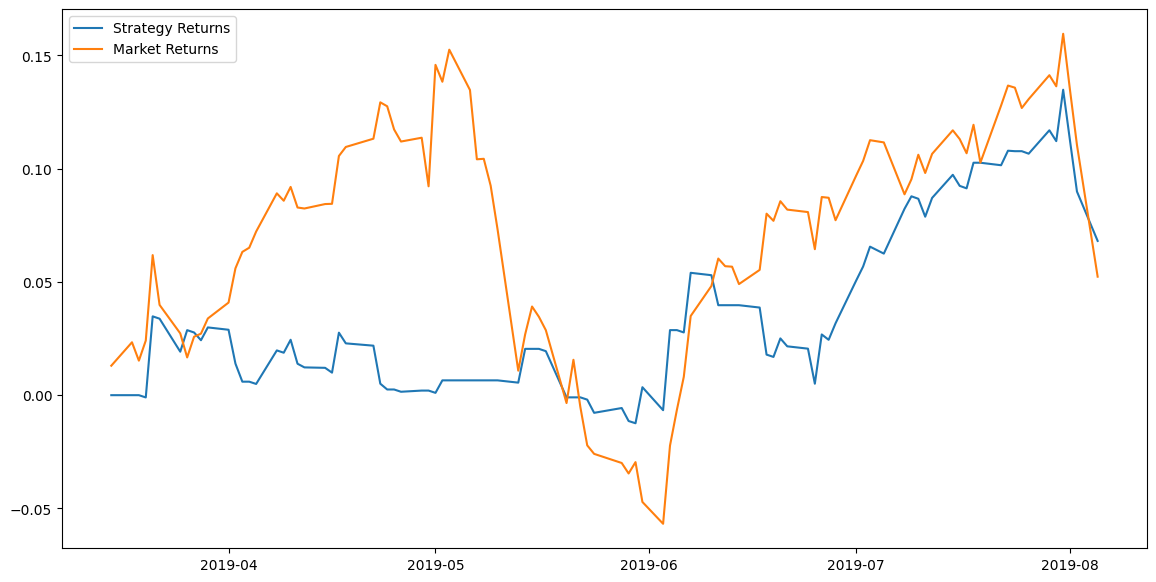

In [136]:
backtest_strategy(apple_stock, trading_signals)